In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [40]:
data=pd.read_csv("E:\\ML project\\non-verbal tourist data.csv")

In [41]:
data.columns

Index(['sex', 'age', 'country', 'returning', 'GImg1', 'GImg2', 'GImg3',
       'PImg1', 'PImg2', 'PImg3', 'PImg4', 'PImg5', 'Tense-relaxed',
       'Authoritative-anarchic', 'Hostile-friendly', 'TAudio1', 'TAudio2',
       'TAudio3', 'QAudio1', 'QAudio2', 'QAudio3', 'Proxemics',
       'Type of Client'],
      dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder

for i in data.columns:
    data[i] = LabelEncoder().fit_transform(data[i])

print(data)

    sex  age  country  returning  GImg1  GImg2  GImg3  PImg1  PImg2  PImg3  \
0     0   16       15          0      2      1      2      1      0      1   
1     1   28        1          0      2      1      2      1      0      2   
2     0    1        6          0      1      1      2      1      0      1   
3     1   17        2          0      2      0      1      1      0      1   
4     1    6        8          0      1      1      2      1      0      1   
..  ...  ...      ...        ...    ...    ...    ...    ...    ...    ...   
68    0   10        6          0      1      0      1      1      0      0   
69    1   12       12          0      0      0      1      1      0      0   
70    0   19        2          0      0      1      2      0      0      0   
71    1   13        7          0      0      0      0      1      0      0   
72    1    3        2          0      0      2      2      1      0      0   

    ...  Authoritative-anarchic  Hostile-friendly  TAudio1  TAu

In [43]:
x=data.drop(columns=["Type of Client"])
y=data['Type of Client']

In [44]:
X=x.values
Y=y.values

In [45]:
model1=LogisticRegression()
model1.fit(X,Y)

c:\Users\Yuvraj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
data.head()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative-anarchic,Hostile-friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,0,16,15,0,2,1,2,1,0,1,...,8,2,2,0,0,1,0,0,0,0
1,1,28,1,0,2,1,2,1,0,2,...,9,0,1,0,0,2,2,0,0,0
2,0,1,6,0,1,1,2,1,0,1,...,1,4,2,0,0,2,0,0,0,0
3,1,17,2,0,2,0,1,1,0,1,...,2,0,2,0,0,2,0,1,0,0
4,1,6,8,0,1,1,2,1,0,1,...,9,2,2,0,0,2,1,0,0,0


In [47]:
len(data)

73

In [48]:
x_test=data[['sex','age','country','returning','GImg1','GImg2','GImg3','PImg1','PImg2','PImg3','PImg4','PImg5','Tense-relaxed','Authoritative-anarchic','Hostile-friendly','TAudio1','TAudio2','TAudio3','QAudio1','QAudio2','QAudio3','Proxemics']].values
y_test=data[['Type of Client']].values

In [66]:
logisreg_accuracy = model1.score(x_test,y_test)
print(logisreg_accuracy)

0.9041095890410958


In [67]:
from sklearn.svm import SVC
model2=SVC()
model2.fit(X,Y)

SVC()

In [68]:
svm_accuracy = model2.score(x_test,y_test)
print(svm_accuracy)

0.6164383561643836


In [69]:
from sklearn import tree
model3=tree.DecisionTreeClassifier()
model3.fit(X,Y)

DecisionTreeClassifier()

In [70]:
dtree_accuracy = model3.score(x_test,y_test)
print(dtree_accuracy)

1.0


In [71]:
from sklearn.model_selection import GridSearchCV #Hyperparameter Tuning.


In [72]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    },
    'decision_tree': {
        'model': tree.DecisionTreeClassifier(),
        'params': {
            'max_depth': [1, 10, 20]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10]
        }
    }
}



In [73]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'],
                       cv=5, return_train_score=False)
    clf.fit(X,Y )
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df3 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df3

c:\Users\Yuvraj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Yuvraj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Yuvraj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.739048,"{'C': 1, 'kernel': 'linear'}"
1,decision_tree,0.630476,{'max_depth': 20}
2,logistic_regression,0.699048,{'C': 1}


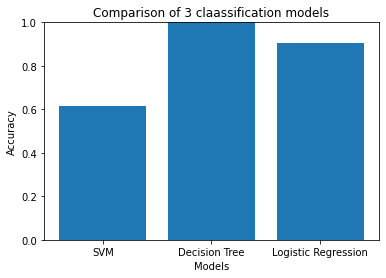

In [74]:
#Plotting the graph
import matplotlib.pyplot as plt 
models = ["SVM","Decision Tree","Logistic Regression"]
accuracy = [svm_accuracy, dtree_accuracy, logisreg_accuracy]

plt.bar(models, accuracy)
plt.ylim(0,1)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of 3 claassification models")
plt.show()